# Worksheet 3: Introduction to Generative Modelling

## Learning Objectives

After completing this week's lecture and tutorial work, you will be able to:

1. Give an example of a question that could be answered by generative modelling.
2. Explain how a linear regression can be used to approximate the underlying mechanism that generated the data (quantitative response and input variables).
3. Interpret the estimated coefficients and $p$-values derived from theoretical results for a simple linear regression (i.e., one input variable).
4. Discuss the assumptions made to estimate the simple linear regression coefficients and approximate their sampling distribution.
5. Explain how to approximate the sampling distribution of the simple linear regression coefficient estimators using bootstrapping. 
6. Contrast the sampling distribution approximated using theoretical results with bootstrapping alternatives for a simple linear regression setting.
7. Compute confidence intervals for the simple linear regression coefficients using theoretical approximations and bootstrapping results.
8. Write a computer script to perform simple linear regression analysis.

In [1]:
# Run this cell before continuing.
library(tidyverse)
library(repr)
library(infer)
library(cowplot)
library(broom)
source("tests_worksheet_03.R")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp



Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches




# Generative models

As data scientists, we are often interested in understanding the relationship between variables in our data using *models*. For example:

- which variables are associated with a response of interest? 

- can we model the relationship between the response and the input variables? Is a linear model adequate?

- which variables are positively/negatively associated with the response? 

- does the relationship between the response and an input variable depend on the values of the other variables?

**Linear Regression Models can be used to answer these questions, providing a unifying framework to study the relation between different type of variables and a continuous response**

Research in linear models has been focused on 3 important aspects: **estimation, inference, and prediction** 

- **Estimation**: how to estimate the true (but unknown) relation between the response and the input variables

- **Inference**: how to use the model to infer information about the unknown relation between variables

- **Prediction**: how to use the model to predict the value of the response for new observations 

**Note**: These goals are related!

# Introduction to Simple Linear Regression (SLR)

The purpose of this worksheet is to practice building, interpreting and testing SLR models. You will also become familiar with `R` functions such as `lm()` and `broom()` to accomplish these tasks. 

> "Simple" refers to a linear model with only *one* input variable!

## Case study

### Cancer Mortality

In this worksheet you will use the dataset `US_cancer_data` that contains data on cancer mortality rate and different demographic and medical variables in American counties. 

#### The question
You will examine the relationship between cancer mortality rates and different demographic and medical variables.

#### Read in data

The data come from [data.world](https://data.world/nrippner/ols-regression-challenge) and other sources: [census.gov](http://census.gov/), [clinicaltrials.gov](http://clinicaltrials.gov/), and [cancer.gov](http://cancer.gov/). All values have been collected in the 2010s but vary per source.

> **Heads up**: Recall the importance of using a *random* sample to obtain representative summaries and broad conclusions!

In the [source documentation](https://data.world/nrippner/ols-regression-challenge) you can find the definition of each of the selected variables:

- `TARGET_deathRate`: a continuous variable that measures cancer mortality per capita (for every 100,000 inhabitants), obtained as an average of data collected from the years 2010-2016.

- `povertyPercent`: a continuous variable that measures percentage of the county's populace in poverty from 2013 American Census estimates.

- `PctPrivateCoverage`: a continuous variable that measures percentage of the county residents with private health coverage from 2013 American Census estimates. 

Let's start by reading this dataset!

In [2]:
US_cancer_data <- read_csv("data/US_county_cancer_data.csv") %>%
  select(TARGET_deathRate, povertyPercent, PctPrivateCoverage)
head(US_cancer_data)

Rows: 3047 Columns: 34
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): binnedInc, Geography
dbl (32): avgAnnCount, avgDeathsPerYear, TARGET_deathRate, incidenceRate, me...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


TARGET_deathRate povertyPercent PctPrivateCoverage
1 164.9            11.2           75.1              
2 161.3            18.6           70.2              
3 174.7            14.6           63.7              
4 194.8            17.1           58.4              
5 144.4            12.5           61.6              
6 176.0            15.6           60.0

# PART I: Estimation

## 1 The Model

You can hypothesize that the cancer mortality of each county is related to the average level of poverty. In this worksheet, you will quantitatively study the association, at county level, between `TARGET_deathRate` and `povertyPercent` using a SLR.

Note that this model is not exact or true. You are *assuming* that the cancer mortality rate changes *at a constant rate* with the percentage of populace poverty? Is this a reasonable assumption?

**Question 1.0**
<br>{points: 1}


Within the context of this case study, answer the following:

**1.0.0.** Which variable will you choose as a response variable? Answer with the column's name from `US_cancer_data`.

**1.0.1.** Which variable will you choose an input variable? Answer with the column's name from `US_cancer_data`.


*Assign your answers to the objects `answer1.0.0` (character type surrounded by quotes), `answer1.0.1` (character type surrounded by quotes).*

In [3]:
# answer1.0.0 <- ...
# answer1.0.0
# answer1.0.1 <- ...
# answer1.0.1

# your code here
answer1.0.0 <- "TARGET_deathRate"
answer1.0.0
answer1.0.1 <- "povertyPercent"
answer1.0.1

[1] "TARGET_deathRate"

[1] "povertyPercent"

In [4]:
test_1.0()

Test passed 😸
Test passed 🌈
Test passed 🥇
[1] "Success!"
Test passed 🎉
Test passed 🌈
Test passed 🥇
[1] "Success!"


**Question 1.1**
<br>{points: 1}

Using `US_cancer_data`, create a scatterplot of the response variable (in the y-axis) versus the input variable (in the x-axis). Call the resulting object `cancer_poverty_scatterplot`. 

> **Heads-up:** It is always important to display units of variables in plots to allow their proper interpretation!

*Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*

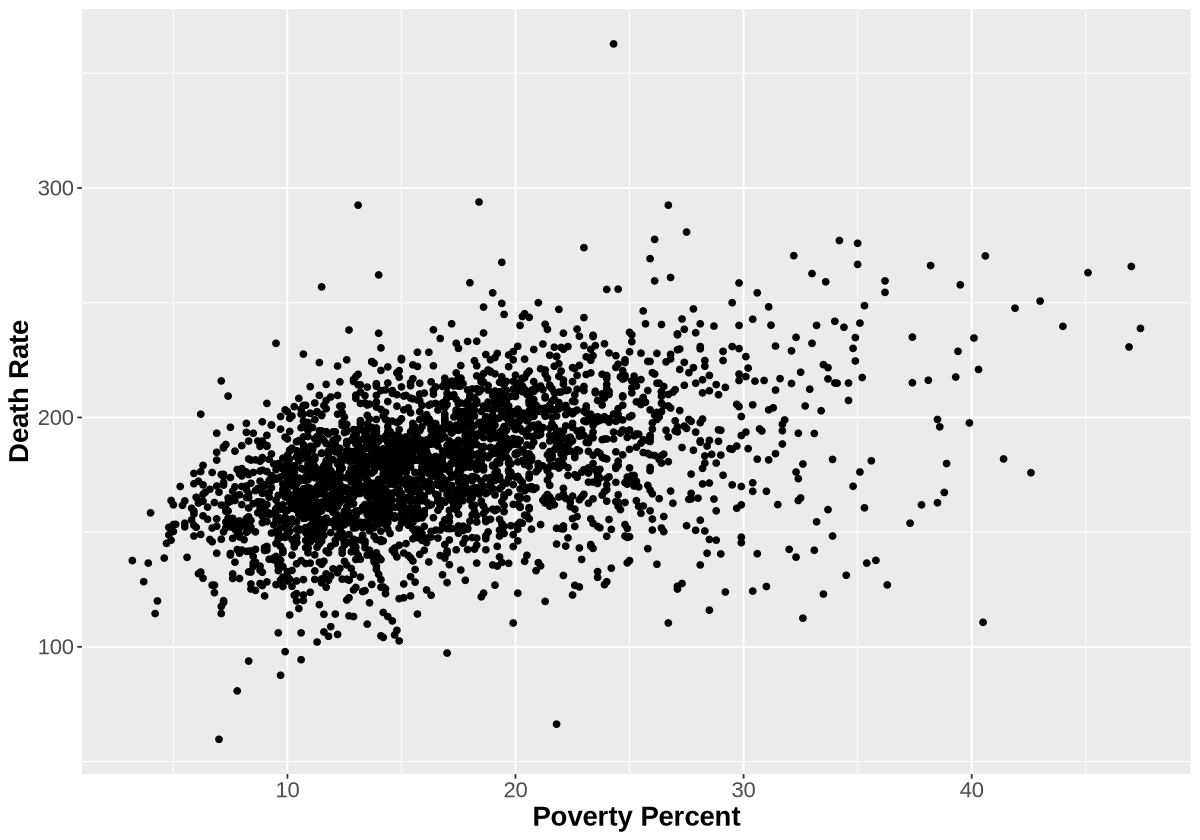

In [5]:
options(repr.plot.width = 10, repr.plot.height = 7) # Adjust these numbers so the plot looks good in your desktop.


# cancer_poverty_scatterplot <- ggplot(..., aes(..., ...)) +
#   ...() +
#   xlab(...) +
#   ylab(...) +
#   theme(
#     text = element_text(size = 16.5),
#     plot.title = element_text(face = "bold"),
#     axis.title = element_text(face = "bold")
#   )
# cancer_poverty_scatterplot

# your code here
cancer_poverty_scatterplot <- ggplot(US_cancer_data, aes(povertyPercent, TARGET_deathRate)) +
  geom_point() +
  xlab("Poverty Percent") +
  ylab("Death Rate") +
  theme(
    text = element_text(size = 16.5),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  )
cancer_poverty_scatterplot



In [6]:
test_1.1()

Test passed 😸
Test passed 🌈
Test passed 🎉
Test passed 🎊
Test passed 🌈
Test passed 🥇
Test passed 🎉
[1] "Success!"


**Question 1.2**
<br>{points: 1}

Based on the `cancer_poverty_scatterplot`, how would you describe the graphical association between the response and the input variables?

**A.** Negative.

**B.** Positive.

*Assign your answer to an object called `answer1.2`. Your answer should be one of `"A"` or `"B"` surrounded by quotes.*

In [7]:
# answer1.2 <- ...

# your code here
answer1.2 <- "B"

In [8]:
test_1.2()

Test passed 🌈
Test passed 🥇
Test passed 😸
[1] "Success!"


## 2. Estimation of the regression line

Let's start by formally defining the linear model. Then you will use data and code to **estimate** it!

Let ${(X_i,Y_i): i = 1, \ldots , n}$ be a <font color="red">random sample</font> of size $n$ from the population

In this example:

- $Y_i$: the cancer mortality per capita for the $i$th county

- $X_i$: percentage of the populace in poverty for the $i$th county

> Note that the response and input are indexed by $i$ which could take on the following values: $1 , \dots, n$ to identify the $i$th county in the data.

Observations from a random sample won't be perfectly lined. The error term contains all factors that deviate $Y_i$ from its conditional expected value.

#### The best line 
The population parameters are *unknown* and *non-random*. We *use data* from a random sample to *estimate* them!! But how ...???

There are infinite lines to choose from ... Which one is the best line??

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


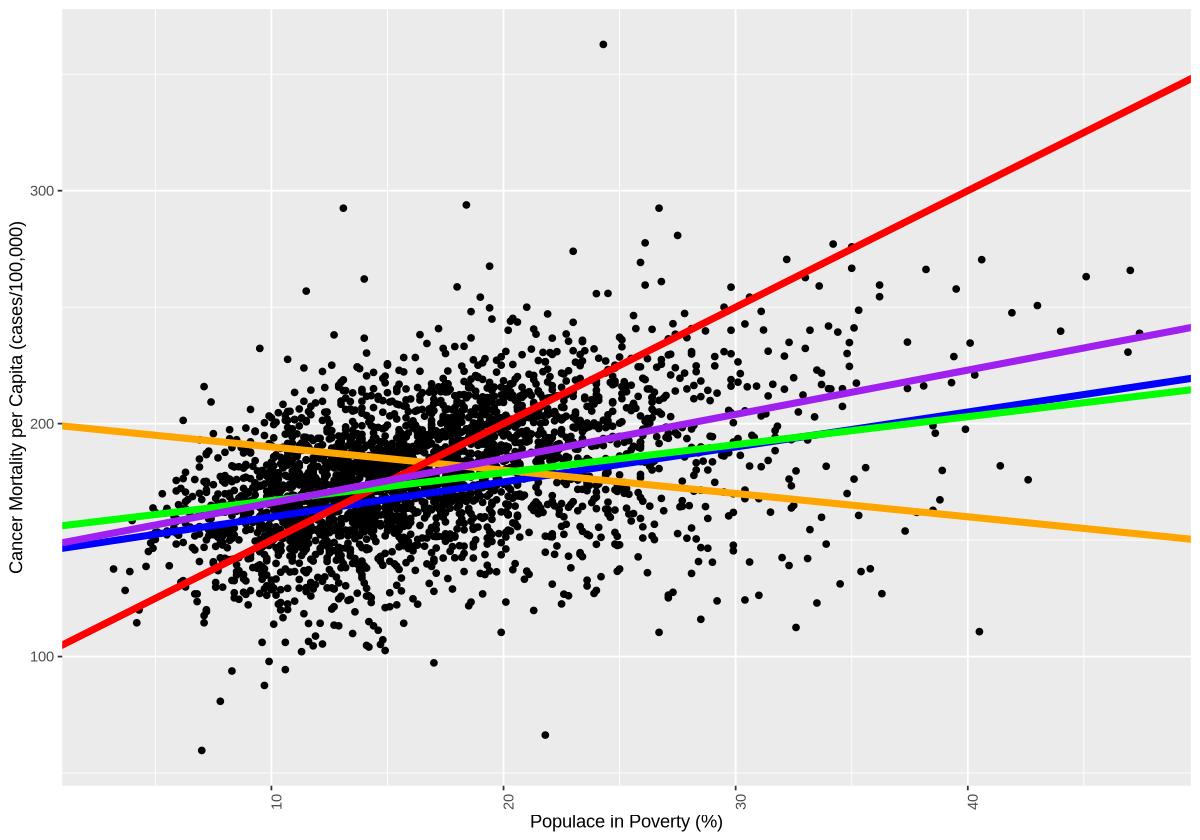

In [9]:
US_cancer_data %>% ggplot(aes(povertyPercent, TARGET_deathRate)) + theme(axis.text.x = element_text(angle = 90))+
    geom_point()+ 
    geom_abline(intercept=145,slope=1.5, size=2, col = "blue")+
    geom_abline(intercept=200,slope=-1, size=2, col = "orange")+
    geom_abline(intercept=100,slope=5, size=2, col = "red")+
    geom_abline(intercept=155,slope=1.2, size=2, col = "green")+
    geom_abline(intercept=147,slope=1.9, size=2, col = "purple")+
    xlab("Populace in Poverty (%)") +
    ylab("Cancer Mortality per Capita (cases/100,000)")

**Question 2.0**
<br>{points: 1}

How would you choose the **best line**? 

**A.** The line that contains most data points 

**B.** The line that minimizes the distance of the points to the line 

**C.** The line that looks the best upon visual inspection

*Assign your answer to an object called `answer2.0`. Your answer should be one of `"A"`, `"B"`, or `"C"` surrounded by quotes.*

In [10]:
# answer2.0 <- ...

# your code here
answer2.0 <- "B"

In [11]:
test_2.0()

Test passed 🎊
Test passed 🥇
Test passed 🎊
[1] "Success!"


**Question 2.1**
<br>{points: 1}

To define the **best line** we need to know how to measure the distance of the points to the line! Which of the following criteria would you choose to define "distance of a point to the line"?? 

> **Note**: there is not a unique answer to this questions but only one corresponds to the least squares criterion

![](img/dist.png)

Figure by Prof. Joel Ostblom

*Assign your answer to an object called `answer2.1`. Your answer should be one of `"A"`, `"B"`, or `"C"` surrounded by quotes.*

In [12]:
# answer2.1 <- ...

# your code here
answer2.1 <- "B"

In [13]:
test_2.1()

Test passed 🥳
Test passed 🌈
Test passed 🌈
[1] "Success!"


Many methods can be used to estimate the true regression line depending on the criteria used to define "optimal"!

**Least Squares (LS) method** minimizes the sum of the *squares of the residuals*!!

#### Check [this application](http://setosa.io/ev/ordinary-least-squares-regression/)

#### Residual 

The residual of an observation is the difference between its response value and its predicted response on the line (dotted vertical line in **B**)

> **Note**: discuss why the **residual** is different from the **error term**. 

## 3. LS in R

We will use the `lm` function in R to obtain the LS estimates using the data in `US_cancer_data`.

> **Heads up**: LS is not the only method to estimate the regression coefficients. However, it is the default method in `lm`

The relevant arguments are:

- `formula`: takes the form `response ~ input`.
- `data`: takes a data frame in tidy format.

> **Note**: `lm(response ~ .,data= df)` uses all variables in the dataset `df`, except the `response`, as predictors 

> **Note**: `lm(response ~ input - 1,data= df)` forces the estimated intercept to be 0. Never do this unless you know what you are doing and why. 

In this dataset we have sample of size in $n = 3047$ to estimate the regression coefficients. To examine the properties of the estimator let's start with a smaller sample and see what happens as the sample size increases.

**Question 3.0**
<br>{points: 1}

From the pool of American counties `US_cancer_data`, use the function `rep_sample_n()` to collect one random sample of size `250` and call it `US_cancer_sample250`.

> Note: in principle the function `sample_n()` can also be used but gives a different output object so the autograding test fails.

*Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*

In [14]:
set.seed(123) # DO NOT CHANGE!

# US_cancer_sample250 <- ...(..., size = ...)

# your code here
US_cancer_sample250 <- rep_sample_n(US_cancer_data, size = 250)

head(US_cancer_sample250)

replicate TARGET_deathRate povertyPercent PctPrivateCoverage
1 1         184.9            17.8           57.6              
2 1         157.6             9.2           72.9              
3 1         197.1            13.5           73.9              
4 1         186.9            27.3           44.0              
5 1         163.6            17.2           69.2              
6 1         165.0            14.3           70.3

In [15]:
test_3.0()

Test passed 🥇
Test passed 🥇
Test passed 🥳
Test passed 🥳
Test passed 🎊
Test passed 🎉
Test passed 🎊
[1] "Success!"


**Question 3.1**
<br>{points: 1}

It is time to use `R` for estimating the SLR using `US_cancer_sample250`. This estimated model can be used to evaluate if there exist a linear association between cancer mortality and poverty.

Use the `lm()` function to estimate the SLR. 

Store this estimated model in the variable `SLR_cancer_sample250`.

*Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*

In [16]:
# SLR_cancer_sample250 <- ...(formula = , data = ...)
# SLR_cancer_sample250

# your code here
SLR_cancer_sample250 <- lm(formula = TARGET_deathRate ~ povertyPercent , data = US_cancer_sample250)
SLR_cancer_sample250


Call:
lm(formula = TARGET_deathRate ~ povertyPercent, data = US_cancer_sample250)

Coefficients:
   (Intercept)  povertyPercent  
       153.036           1.519  


In [17]:
test_3.1()

Test passed 🥇
Test passed 😀
Test passed 😀
Test passed 🥇
Test passed 🥇
[1] "Success!"


**Question 3.2: Interpretation of the estimated line**
<br>{points: 1}

What is the correct interpretation of the regression estimated slope in `SLR_cancer_sample250_results`?

**A.** The effect of a one percent increase of the county's populace in poverty is 1.52 increase in the cancer mortality per capita (cases/100,000).

**B.** One percent increase of the county's populace in poverty causes 1.52 increase in cancer mortality per capita (cases/100,000).

**C.** The expected cancer mortality per capita (cases/100,000) increases by 1.52 per one percent increase of the county's populace in poverty.

*Assign your answer to an object called `answer3.2`. Your answer should be one of `"A"`, `"B"`, or `"C"` surrounded by quotes.*

In [18]:
# answer3.2 <- ...

# your code here
answer3.2 <- "C"

In [19]:
test_3.2()

Test passed 🌈
Test passed 🎊
Test passed 🥇
[1] "Success!"


**Question 3.3: Visualization of the estimated line**
<br>{points: 1}

Using `US_cancer_sample250`, we can plot `TARGET_death_rate` versus `povertyPercent` **with points** and add the estimated SLR. The `ggplot()` object's name will be `SLR_cancer_sample250_plot`

*Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*

`geom_smooth()` using formula = 'y ~ x'


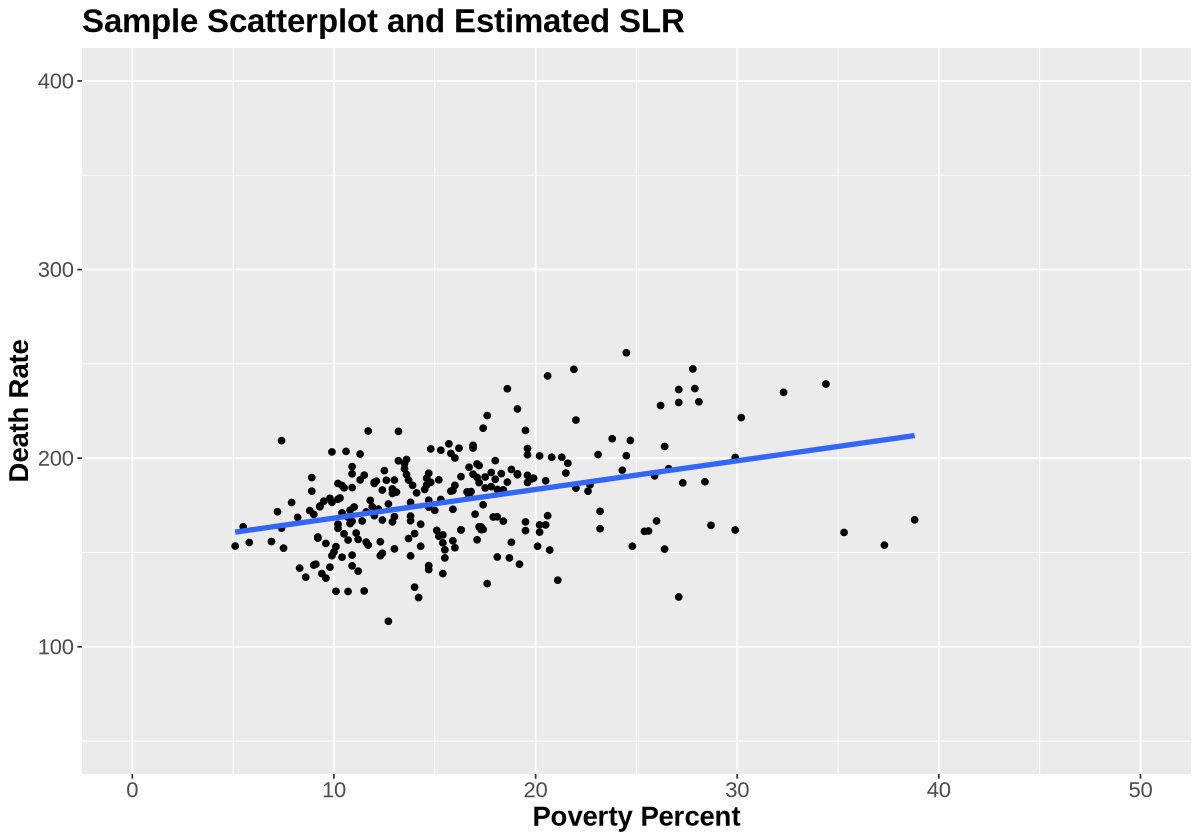

In [20]:
# SLR_cancer_sample250_plot <- ggplot(..., aes(..., ...)) +
#   ...() +
#   ...(aes(..., ...), ..., se = FALSE, size = 1.5) +
#   coord_cartesian(xlim = c(0, 50), ylim = c(50, 400)) +
#   xlab(...) +
#   ylab(...) +
#   ggtitle("Sample Scatterplot and Estimated SLR") +
#   theme(
#     text = element_text(size = 16.5),
#     plot.title = element_text(face = "bold"),
#     axis.title = element_text(face = "bold")
#   )


# your code here
SLR_cancer_sample250_plot <- ggplot(US_cancer_sample250, aes(povertyPercent, TARGET_deathRate)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, size = 1.5) +
  coord_cartesian(xlim = c(0, 50), ylim = c(50, 400)) +
  xlab("Poverty Percent") +
  ylab("Death Rate") +
  ggtitle("Sample Scatterplot and Estimated SLR") +
  theme(
    text = element_text(size = 16.5),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  )

SLR_cancer_sample250_plot



In [21]:
test_3.3()

Test passed 🥇
Test passed 🎊
Test passed 🎊
Test passed 🌈
Test passed 🥳
Test passed 🥇
Test passed 😀
Test passed 😀
[1] "Success!"


**Question 3.4**
<br>{points: 1}

Considering the SLR model estimated in this exercise, which of the following questions relates to inference and estimation, and which relates to prediction? 

| **Question** | **Type** |
| ------------------------------- | ----------------------- |
| How can we determine an association between the expected cancer mortality per capita (cases/100,000) and the county’s populace living in poverty of all American counties? | `answer3.4.0` |
| We observe a new American county with 14% of its populace living in poverty. What cancer mortality per capita (cases/100,000) should we expect? | `answer3.4.1` |

The right column of the table is empty but should describe one of the following: 

**A.** Prediction.

**B.** Inference and estimation.

*Assign your answers to the objects `answer3.4.0` and `answer3.4.1`. Your answer should each be a single character (`"A"` or `"B"`) surrounded by quotes.*

In [22]:
# answer3.4.0 <- ...
# answer3.4.1 <- ...

# your code here
answer3.4.0 <- "B"
answer3.4.1 <- "A"

In [23]:
test_3.4()

Test passed 🥳
Test passed 😀
Test passed 🥳
[1] "Success!"
Test passed 🥇
Test passed 😀
Test passed 🎊
[1] "Success!"


# PART II: Inference

Since the parameters of the linear model ($\beta_0$ and $\beta_1$) are unknow you use a random sample to estimate with a LS estimator ($\hat{\beta}_0$ and $\hat{\beta}_1$). 

In particular, in this case study, the estimated intercept and slope in `SLR_cancer_sample250_results` are computed using the $n = 250$ sampled observations from `US_cancer_data`. 

> We can think that the *estimates* are (good) guesses about the population parameters based on our data. 

In this section we will examine how we can infer information about the *population* parameters from the *estimated* parameters. 

## Randomness

Since $\hat{\beta}_0$ and $\hat{\beta}_1$ are computed from a random sample, they are random variables themselves! The values of the estimates *depend* on the random sample used to compute them:

> **Important**: different samples yield different estimates!!

Let's see an example! Recall the estimates we obtained with the sample taken:

In [24]:
SLR_sample250_0 <- tidy(lm(formula = TARGET_deathRate ~ povertyPercent, data = US_cancer_sample250)) %>% select(estimate)
many_SLR <- SLR_sample250_0 
many_SLR

estimate  
1 153.035718
2   1.519133

Take *another sample* from the full dataset and estimate the regression line

> **Important**: In practice, we will rarely take multiple samples!

> **NOTE**: This is NOT bootstrapping!! Why??

In [25]:
set.seed(301)

US_cancer_sample250_1 <- rep_sample_n(US_cancer_data, size = 250)


In [26]:
# ANOTHER POINT ESTIMATES

SLR_sample250_1 <- tidy(lm(formula = TARGET_deathRate ~ povertyPercent, data = US_cancer_sample250_1))  %>% select(estimate)
many_SLR <- many_SLR %>% bind_cols(SLR_sample250_1)
many_SLR

New names:
• `estimate` -> `estimate...1`
• `estimate` -> `estimate...2`


estimate...1 estimate...2
1 153.035718   142.87974   
2   1.519133     2.16317

In [27]:
set.seed(30)

US_cancer_sample250_2 <- rep_sample_n(US_cancer_data, size = 250)

In [28]:
# ANOTHER POINT ESTIMATES

SLR_sample250_2 <- tidy(lm(formula = TARGET_deathRate ~ povertyPercent, data = US_cancer_sample250_2))  %>% select(estimate)
many_SLR <- many_SLR  %>% bind_cols(SLR_sample250_2)
many_SLR

New names:
• `estimate` -> `estimate...3`


estimate...1 estimate...2 estimate...3
1 153.035718   142.87974    144.631437  
2   1.519133     2.16317      1.881073

#### and so on .... as we take new samples we get different *estimates* of the regression parameters

> **Important**: what is the sample-to-sample variation??

## 4. The standard error!!

The variation of these estimates from sample to sample is measured by their standard deviation, which has a special name: *the standard error* (SE)

> But in practice, how can we compute the standard error if we have only 1 sample?? 

We have different ways of answering this question:

1. take multiple samples from the population and compute multiple estimates as we did above. Then compute their SD. But this is *not a realistic option*  

2. use a theoretical result! This is what `lm` does!!

3. use bootstrapping!! As you did in STAT 201 for other quantities!! This is what we will also do in STAT 301

**Question 4.0**
<br>{points: 1}

Use the `broom` package's `tidy()` to obtain the estimated coefficients, associated standard errors, $t$-statistics, and $p$-values obtained from the random sample `SLR_cancer_sample250`. 

Store them in the variable `SLR_cancer_sample250_results` whose columns are the following:

- The first column has the names of the regression terms.

- The second column shows the values of the estimated coefficients of the regression line, $\hat{\beta}_0$ and $\hat{\beta}_1$ 

- The remaining three columns have important quantities to assess uncertainty and test hypotheses about the regression terms (we'll learn more about these quantities later).

*Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*

In [29]:
# SLR_cancer_sample250_results <- ...(...) %>% mutate_if(is.numeric, round, 2)
# SLR_cancer_sample250_results

# your code here
SLR_cancer_sample250_results <- broom::tidy(SLR_cancer_sample250) %>% mutate_if(is.numeric, round, 2)
SLR_cancer_sample250_results

term           estimate std.error statistic p.value
1 (Intercept)    153.04   4.22      36.22     0      
2 povertyPercent   1.52   0.25       6.19     0

In [30]:
test_4.0()

Test passed 🎉
Test passed 🥳
Test passed 🎉
Test passed 🥇
Test passed 🥇
Test passed 🎉
Test passed 🎉
Test passed 🥳
[1] "Success!"


## 5. Hypothesis Tests

The object `SLR_cancer_sample250_results` contains useful information to test some hypotheses about the regression coefficients.

### 5.1 The null hypothesis

As in other hypothesis tests, the null hypothesis claims a *null* state. In SLR, the *null* relation between the response and the input variable(s). 

> **Note**: the null hypothesis claims the contrary of what we want to prove. We will prove our point finding sufficient evidence in the data to reject $H_0$. 

**Question 5.1**
<br>{points: 1}

Suppose we want to test if the there exist a linear association between cancer mortality and poverty. Which of the following null hypotheses is correct:

**A.** $H_0: \hat{\beta}_1 = 0 $

**B.** $H_0: \hat{\beta}_0 = 0 $

**C.** $H_0: \beta_1 = 0$ 

**D.** $H_0: \beta_0 = 0$ 

*Assign your answer to an object called `answer5.1`. Your answer should be one of `"A"`, `"B"`, `"C"`, or `"D"` surrounded by quotes.*

In [31]:
# answer5.1 <- 

# your code here
answer5.1 <- "C"

In [32]:
test_5.1()

Test passed 🥇
Test passed 🌈
Test passed 🥇
[1] "Success!"


### 5.2 The alternative hypothesis 

The alternative hypothesis reflects our believes about reality. 

> **Heads up**: Although the alternative hypothesis contains the claim that we want to prove, it is important to note that in statistics we are not proving that the null hypothesis is true or false! We can only *reject* or *fail to reject* the null hypothesis based on our evidence in the data!!

**Question 5.2**
<br>{points: 1}

Suppose we want to test if the there exist a positive (linear) association between the response and the input variable. Which of the following null hypotheses is correct:

**A.** $H_1: \hat{\beta}_1 > 0 $

**B.** $H_1: \hat{\beta}_0 > 0 $

**C.** $H_1: \beta_1 \neq 0$ 

**D.** $H_1: \beta_1 > 0$ 

*Assign your answer to an object called `answer5.2`. Your answer should be one of `"A"`, `"B"`, `"C"`, or `"D"` surrounded by quotes.*

In [33]:
# answer5.2 <- 

# your code here
answer5.2 <- "D"

In [34]:
test_5.2()

Test passed 🌈
Test passed 🥳
Test passed 🌈
[1] "Success!"


### 5.3 The statistic and $p$-value

To test $H_0$ we can use our estimated slope and check how far the estimate $\hat{\beta}_1$ is from $0$. The test statistic is a relative measure that we can use base on our data. It can be found in the column `statistic` from `SLR_cancer_sample250_results`

Using classical results of the sampling distribution of the LS estimators, `lm` computes $p$-values for the test. In `SLR_cancer_sample250_results`, you can find the $p$-values in the column `p.value`. 

> **Heads up**: By default, the alternative hypothesis is $H_1: \beta_j \neq 0$, for all $j$th coefficients. But you can change the default settings!!

The `p.value` is interpreted as the probability, under $H_0$, that $\mid T \mid$ is equal or larger than the value observed in our sample (given in the column `statistic` of `SLR_cancer_sample250_results`). 

**Question 5.3**

Which of the following statement is correct??

**A.** The p-value is not the probability that the null hypothesis is true

**B.** The p-value is the probability that the alternative hypothesis is false

**C.** The p-value indicates the size or importance of the observed effect

**D.** The p-value is the probability that the observed effects were produced by random chance alone.

*Assign your answer to an object called `answer5.3`. Your answer should be one of `"A"`, `"B"`, `"C"`, or `"D"` surrounded by quotes.*

In [35]:
# answer5.3 <- 

# your code here
answer5.3 <- "A"

In [36]:
test_5.3()

Test passed 😀
Test passed 🌈
Test passed 🌈
[1] "Success!"


### 5.4 Decision rule

The smaller the $p$-value, the stronger the evidence against $H_0$. Thus, small $p$-values (less than the significance level $\alpha$) indicate that the data provides enough statistical evidence against the null hypothesis of no association (i.e., to reject $H_0$).

> **Heads up**: in the last years, the scientific community has identified the "crisis of p-values". If you are interested in this topic you can read more about it in [this article](https://www.nature.com/articles/d41586-019-00857-9) and in the [ASA statement](https://www.stat.berkeley.edu/~aldous/Real_World/ASA_statement.pdf).

**Question 5.4**
<br>{points: 1}

Using the output stored in `SLR_cancer_sample250_results` and a significance level $\alpha = 0.05$, in plain words, what is the conclusion of the following hypothesis test?

$H_0: \beta_1 = 0 $

$H_1: \beta_1 \neq 0 $

**A.** We accept the alternative hypothesis; thus, the percentage of the county's populace in poverty has a statistically significant effect on the county's cancer mortality per capita (cases/100,000).

**B.** We reject the null hypothesis; thus, the percentage of the county's populace in poverty is statistically associated with the county's cancer mortality per capita (cases/100,000).

**C.** We fail to reject the null hypothesis; thus, the percentage of the county's populace in poverty is not statistically associated with the county's cancer mortality per capita (cases/100,000).

*Assign your answer to an object called `answer5.4`. Your answer should be one of `"A"`, `"B"`, or `"C"` surrounded by quotes.*

In [37]:
# answer5.4 <- 

# your code here
answer5.4 <- "B"

In [38]:
test_5.4()

Test passed 😸
Test passed 😸
Test passed 🎊
[1] "Success!"


## 6. Confidence Intervals

The values in `SLR_cancer_sample250_results` can also be used to compute confidence intervals for the regression parameters! 

**Note**: A 95% CI computed from the data is **not** a range of values that contain the true regression parameter with 95% probability. Once the interval has been computed based on the data, *nothing is random*! so it either covers or not the true value. 

**Question 6.0**
<br>{points: 1}

Using `SLR_cancer_sample250` via `tidy()`, obtain the asymptotic 95% CIs for each regression parameters.

*Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*

In [39]:
# SLR_cancer_sample250_CIs <- ...(..., ...) %>% mutate_if(is.numeric, round, 2)
# SLR_cancer_sample250_CIs

# your code here
SLR_cancer_sample250_CIs <- tidy(SLR_cancer_sample250, conf.int = TRUE) %>% mutate_if(is.numeric, round, 2)
SLR_cancer_sample250_CIs

term           estimate std.error statistic p.value conf.low conf.high
1 (Intercept)    153.04   4.22      36.22     0       144.71   161.36   
2 povertyPercent   1.52   0.25       6.19     0         1.04     2.00

In [40]:
test_6.0()

Test passed 🥳
Test passed 🥇
Test passed 😸
Test passed 😸
Test passed 🥳
Test passed 😸
Test passed 😀
Test passed 🎊
Test passed 🎊
Test passed 🥇
[1] "Success!"


## 7. The Sampling Distribution

We mentioned before that the estimators of the regression coefficient, $\hat{\beta}_0$ and $\hat{\beta}_1$, are *random variables*. Then they also have a *distribution*, called the *sampling distribution* (same as in STAT 201!). And we need this distribution to compute $p$-values!!

But how do we know the *sampling distribution* (i.e., the distribution of the estimators of the regression coefficients)??

We have different ways of answering this question:

1. take multiple samples from the population and compute multiple estimates as we did above. Then look at their distribution. But this is *not a realistic option* 

2. use a theoretical result! This is what `lm` does!!

3. use bootstrapping!! As you did in STAT 201 for other quantities!! This is what we will also do in STAT 301

In Statistics, bootstrapping refers to sampling from our original sample **with replacement** (also called **resampling with replacement**) to generate a **bootstrap sampling distribution**. 

>  **Heads up**: **sampling with replacement** means that each time we choose an observation from the sample, we return it before randomly selecting another. Resampling with replacement is required to get enough samples to approximate the sampling variation.

The idea is to use the original sample as an *estimate* of the unknown population. 

<font color="blue">Again, note that we are sampling from the sample!! not from the population!!</font>

Using *bootstraping*, we generate a *long* list of estimates to *empirically* approximate the sampling distribution!

- sample with replacement to obtain $B$ samples with size $n$

- for each sample, compute the estimated regression coefficients

- use the $B$ regression estimates of a given population parameter to calculate the sampling distribution of its estimator

> **Heads up**: this list can also be used to estimate the mean and the standard error of the estimator

### 7.1 Bootstrap estimates

Let's generate a bootstrap list of estimates from `US_cancer_sample250`.

**Question 7.1.0**
<br>{points: 1}

Let's approximate the bootstrapping sampling distribution using `US_cancer_sample250`. 

Obtain $B = 1000$ sets of regression estimates by fitting a SLR $B$ times using their respective boostrap sample. Store the corresponding bootstrap estimates in the data frame `lm_boot250` of 1000 rows and two columns:

- `boot_intercept`: list of bootstrap intercepts
- `boot_slope`: list of bootstrap slopes 

*Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*

In [41]:
set.seed(123)  # DO NOT CHANGE!

# n <- ...
# B <- ...

# lm_boot250 <- replicate(..., {
#   sample_n(..., ..., ...) %>%
#     lm(..., data = .) %>%
#     .$coef
# })
# lm_boot250 <- data.frame(boot_intercept = lm_boot250[1, ], boot_slope = lm_boot250[2, ])

# head(lm_boot250)
# tail(lm_boot250)

# your code here
n <- nrow(US_cancer_sample250)
B <- 1000

lm_boot250 <- replicate(B, {
  sample_n(US_cancer_sample250, size = n, replace = TRUE) %>%
    lm(TARGET_deathRate ~ povertyPercent, data = .) %>%
    .$coef
})
lm_boot250 <- data.frame(boot_intercept = lm_boot250[1, ], boot_slope = lm_boot250[2, ])

head(lm_boot250)
tail(lm_boot250)



boot_intercept boot_slope
1 157.7048       1.159769  
2 155.3140       1.507784  
3 152.7072       1.451806  
4 149.4375       1.731707  
5 147.7216       1.965360  
6 155.6035       1.191460

boot_intercept boot_slope
995  153.4655       1.483698  
996  156.7828       1.148930  
997  148.4553       1.840999  
998  158.8579       1.162391  
999  143.9953       2.076423  
1000 151.5481       1.581412

In [42]:
test_7.1.0()

Test passed 🌈
Test passed 😀
Test passed 🥇
Test passed 🌈
Test passed 🎊
Test passed 🥇
[1] "Success!"


#### Using `infer`

Note that you can also use the `infer` package to get a list of bootstrap estimates of the regression coefficients!! As an exaple, let's get the list of the slope of the SLR.

**Question 7.1.1**
<br>{points: 1}

Use the package `infer` to generate bootstrap samples from `US_cancer_sample250` and estimate the slope of the SLR for each bootstrap sample.

Obtain $B = 1000$ sets of regression estimates by fitting a SLR $B$ times using their respective boostrap sample. Store the corresponding estimates per boostrap sample in an object called `bootstrap_slope_infer`. 

The resulting object should have 1000 rows and two columns:

- `replicate`: a numeric ID to identify the bootstrap sample and estimate
- `stat`: the bootstrap slope estimated from the corresponding bootstrap sample

*Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*

In [43]:
set.seed(123)  # DO NOT CHANGE!

# bootstrap_slope_infer <- ... %>% 
#   specify(formula = ... ~ ...) %>%
#   generate(reps = ..., type = "bootstrap") %>% 
#   calculate(stat = "slope")
# head(bootstrap_slope_infer)

# your code here
bootstrap_slope_infer <- US_cancer_sample250 %>% 
  specify(formula = TARGET_deathRate ~ povertyPercent) %>%
  generate(reps = B, type = "bootstrap") %>% 
  calculate(stat = "slope")
head(bootstrap_slope_infer)

replicate stat    
1 1         1.159769
2 2         1.507784
3 3         1.451806
4 4         1.731707
5 5         1.965360
6 6         1.191460

**Note**: each method uses different functions to generate bootstrap samples so even if we use the same seeds you don't get the same samples and estimates.

In [44]:
test_7.1.1()

Test passed 🌈
Test passed 😀
Test passed 🥇
Test passed 🌈
Test passed 🎊
[1] "Success!"


### 7.2 Bootstrap sampling distribution

Let's approximate the sampling distribution of the regression estimators in our problem using the list of bootstrap estimates generated from `US_cancer_sample250`

**Question 7.2.0**
<br>{points: 1}

Now that we have a list of bootstrap estimates, we can compute the visualize sampling distribution!

Let's focus on the sampling distribution of the slope. Use the list of bootstrapped estimates of the slopes stored in `lm_boot250` to plot the sampling distribution of the least square estimator of the slope.

The `ggplot()` object's name will be `slope_sampling_dist_250`


*Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*

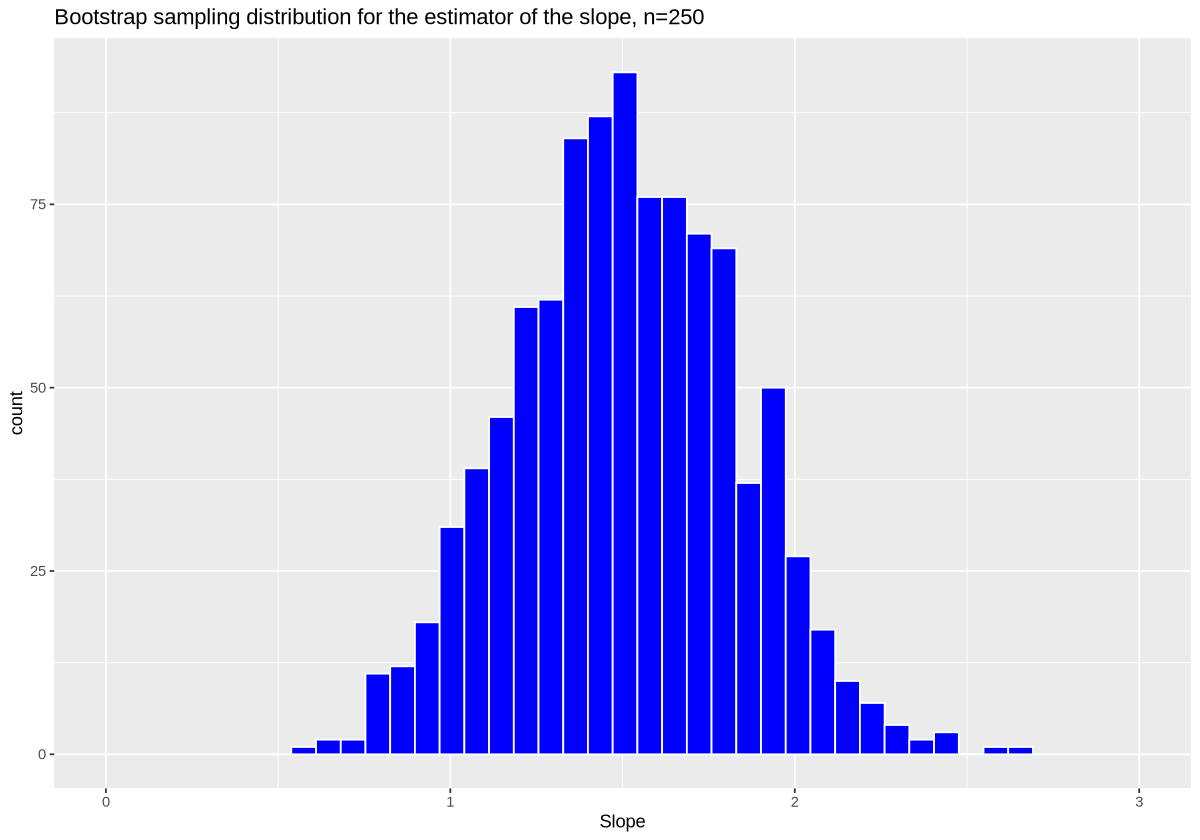

In [45]:
#slope_sampling_dist_250 <-  ggplot(..., aes(x = ...)) +
#    geom_histogram(bins = 30, color = "white", fill = "blue") +
#    coord_cartesian(xlim = c(0, 3)) +
#    xlab("...") +
#    ggtitle("Bootstrap sampling distribution for the estimator of the slope, n=250")

#slope_sampling_dist_250 


# your code here
slope_sampling_dist_250 <-  ggplot(lm_boot250, aes(x = boot_slope)) +
   geom_histogram(bins = 30, color = "white", fill = "blue") +
   coord_cartesian(xlim = c(0, 3)) +
   xlab("Slope") +
   ggtitle("Bootstrap sampling distribution for the estimator of the slope, n=250")

slope_sampling_dist_250 



In [46]:
test_7.2.0()

Test passed 🥇
Test passed 🥳
Test passed 🥳
Test passed 🥇
Test passed 🎉
Test passed 😀
Test passed 😀
Test passed 🎉
[1] "Success!"


#### With `infer`

You can also use the package `infer` to visualize the distribution of the bootstrap estimates generated. Check how similar both plots are!!

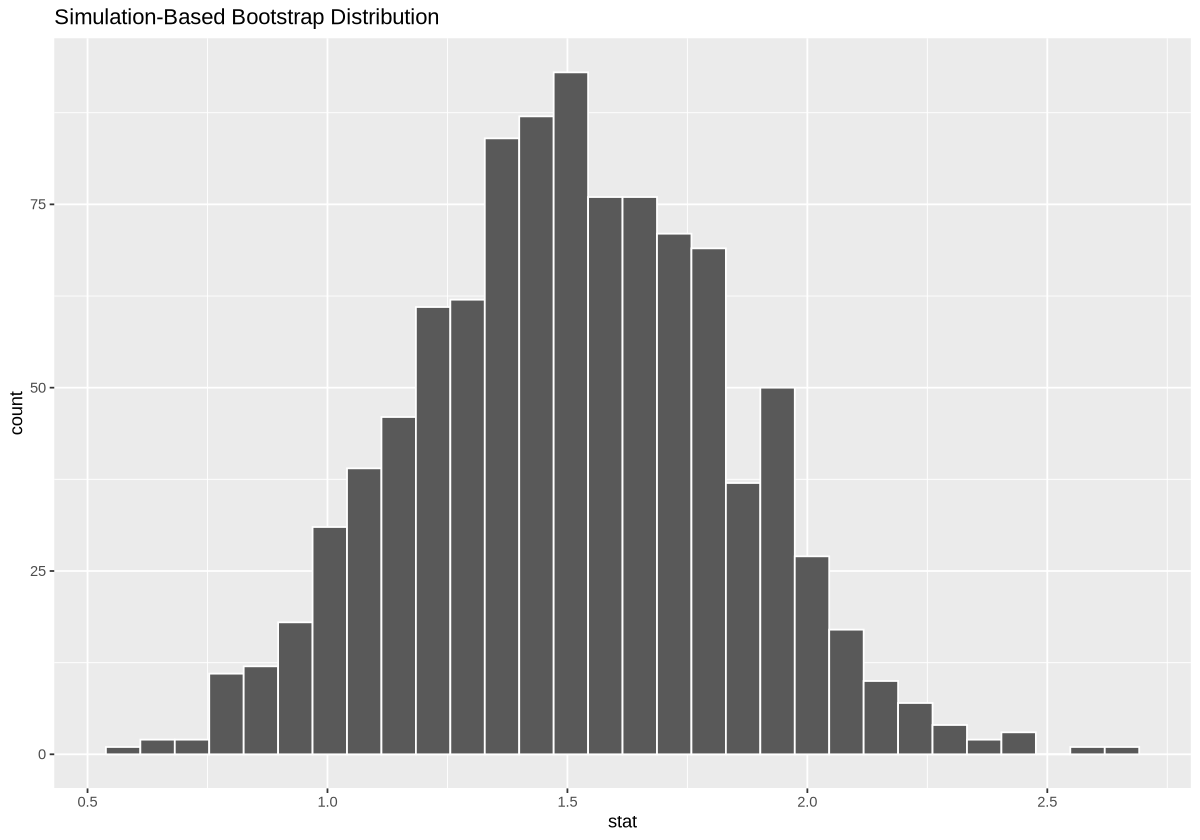

In [47]:
#run this cell

visualize(bootstrap_slope_infer, bin=30)

### Does the sample size matter?

Our estimator depends on a random sample and thus on its size! What happen to the estimates and the sampling distribution when we change the sample size? 

Let's approximate the sampling distribution of estimators computed from samples of different sizes 

**Question 7.2.1**
<br>{points: 2}

- start with a new sample of size $n=500$

- repeat the bootstrapping experiment above 

- plot the sampling distribution

The `ggplot()` object's name will be `slope_sampling_dist_500`

*Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*

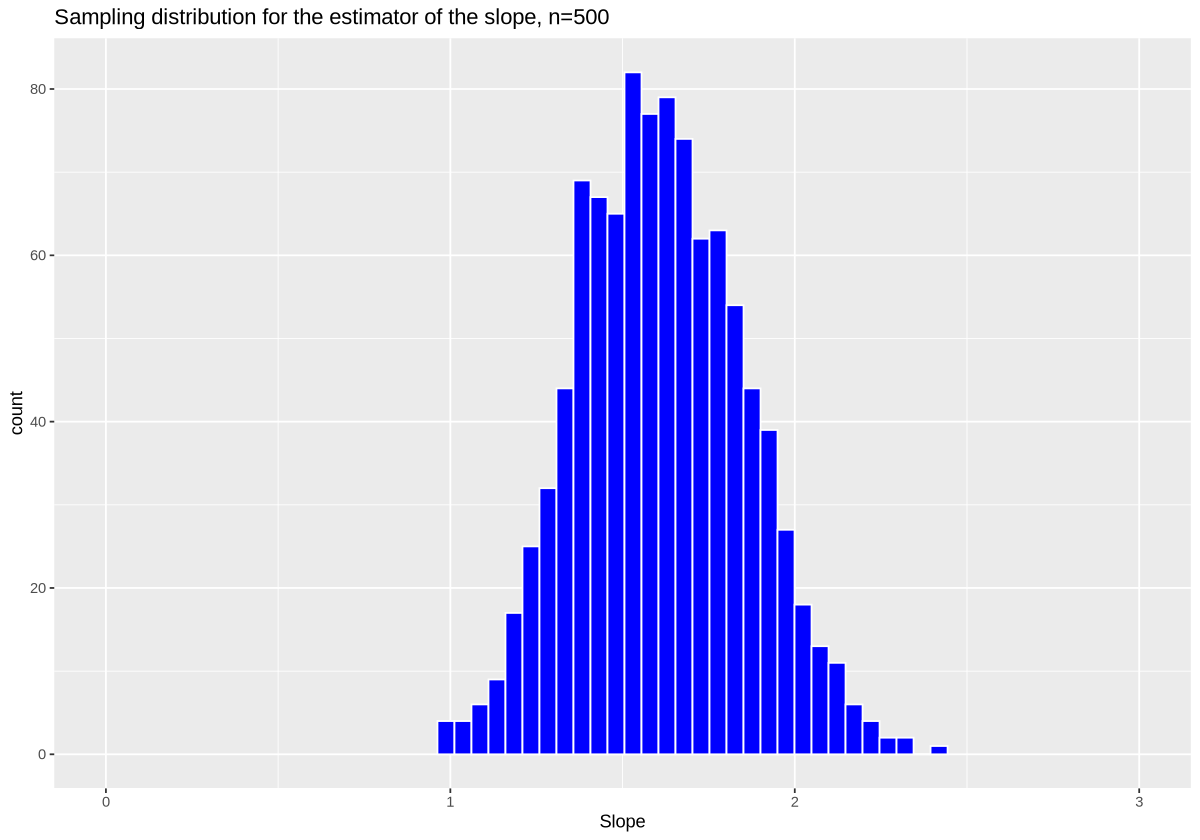

In [48]:
set.seed(123)  # DO NOT CHANGE!
US_cancer_sample500 <- rep_sample_n(US_cancer_data, size = 500)  # DO NOT CHANGE!

# n <- ...
# B <- ...

# lm_boot500 <- replicate(..., {
#   sample_n(..., ..., ...) %>%
#     lm(..., data = .) %>%
#     .$coef
# })
# lm_boot500 <- data.frame(boot_intercept = lm_boot500[1, ], boot_slope = lm_boot500[2, ])

#slope_sampling_dist_500 <-  ggplot(..., aes(x = ...)) +
#    geom_histogram(bins = ...,color = "white", fill = "blue") +
#    coord_cartesian(xlim = c(0, 3)) +
#    xlab("...") +
#    ggtitle("Sampling distribution for the estimator of the slope, n=500")

#slope_sampling_dist_500 



# your code here
n <- 500
B <- 1000

lm_boot500 <- replicate(B, {
  sample_n(US_cancer_sample500, size = n, replace = TRUE) %>%
    lm(TARGET_deathRate ~ povertyPercent, data = .) %>%
    .$coef
})
lm_boot500 <- data.frame(boot_intercept = lm_boot500[1, ], boot_slope = lm_boot500[2, ])

slope_sampling_dist_500 <-  ggplot(lm_boot500, aes(x = boot_slope)) +
   geom_histogram(bins = 30,color = "white", fill = "blue") +
   coord_cartesian(xlim = c(0, 3)) +
   xlab("Slope") +
   ggtitle("Sampling distribution for the estimator of the slope, n=500")

slope_sampling_dist_500 

In [49]:
test_7.2.1()

Test passed 🌈
Test passed 🌈
Test passed 🌈
Test passed 🥳
Test passed 🥳
Test passed 🎊
Test passed 🌈
Test passed 😸
[1] "Success!"


**Question 7.2.2**
<br>{points: 1}

- use sample of $n=1500$ American counties!

- repeat the bootstrapping experiment above 

- plot the sampling distribution

The `ggplot()` object's name will be `slope_sampling_dist_1500`

*Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*

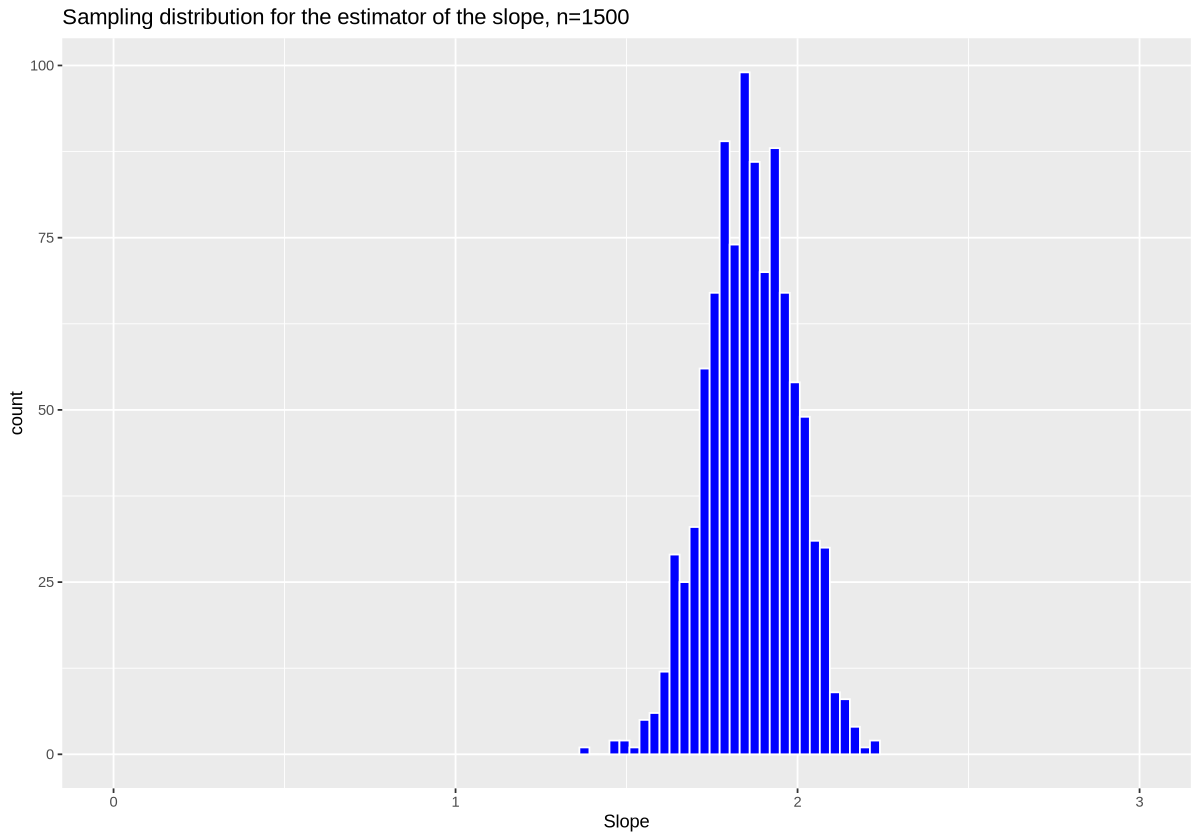

In [50]:
set.seed(123)  # DO NOT CHANGE!

# n <- ...
# B <- ...

# lm_boot1500 <- replicate(..., {
#   sample_n(..., ..., ...) %>%
#     lm(..., data = .) %>%
#     .$coef
# })
# lm_boot1500 <- data.frame(boot_intercept = lm_boot1500[1, ], boot_slope = lm_boot1500[2, ])

#slope_sampling_dist_1500 <-  ggplot(..., aes(x = ...)) +
#    geom_histogram(bins = ..., color = "white", fill = "blue") +
#    coord_cartesian(xlim = c(0, 3)) +
#    xlab("...") +
#    ggtitle("Sampling distribution for the estimator of the slope, n=1500")

#slope_sampling_dist_1500



# your code here

n <- 1500
B <- 1000

lm_boot1500 <- replicate(B, {
  sample_n(US_cancer_data, size = n, replace = TRUE) %>%
    lm(TARGET_deathRate ~ povertyPercent, data = .) %>%
    .$coef
})
lm_boot1500 <- data.frame(boot_intercept = lm_boot1500[1, ], boot_slope = lm_boot1500[2, ])

slope_sampling_dist_1500 <-  ggplot(lm_boot1500, aes(x = boot_slope)) +
   geom_histogram(bins = 30, color = "white", fill = "blue") +
   coord_cartesian(xlim = c(0, 3)) +
   xlab("Slope") +
   ggtitle("Sampling distribution for the estimator of the slope, n=1500")

slope_sampling_dist_1500

In [51]:
test_7.2.2()

Test passed 🌈
Test passed 🎉
Test passed 🎉
Test passed 😀
Test passed 🎊
Test passed 🌈
Test passed 😸
Test passed 🌈
[1] "Success!"


Looking at the 3 sampling distributions obtained by bootstrapping from samples of different sizes, side-by-side

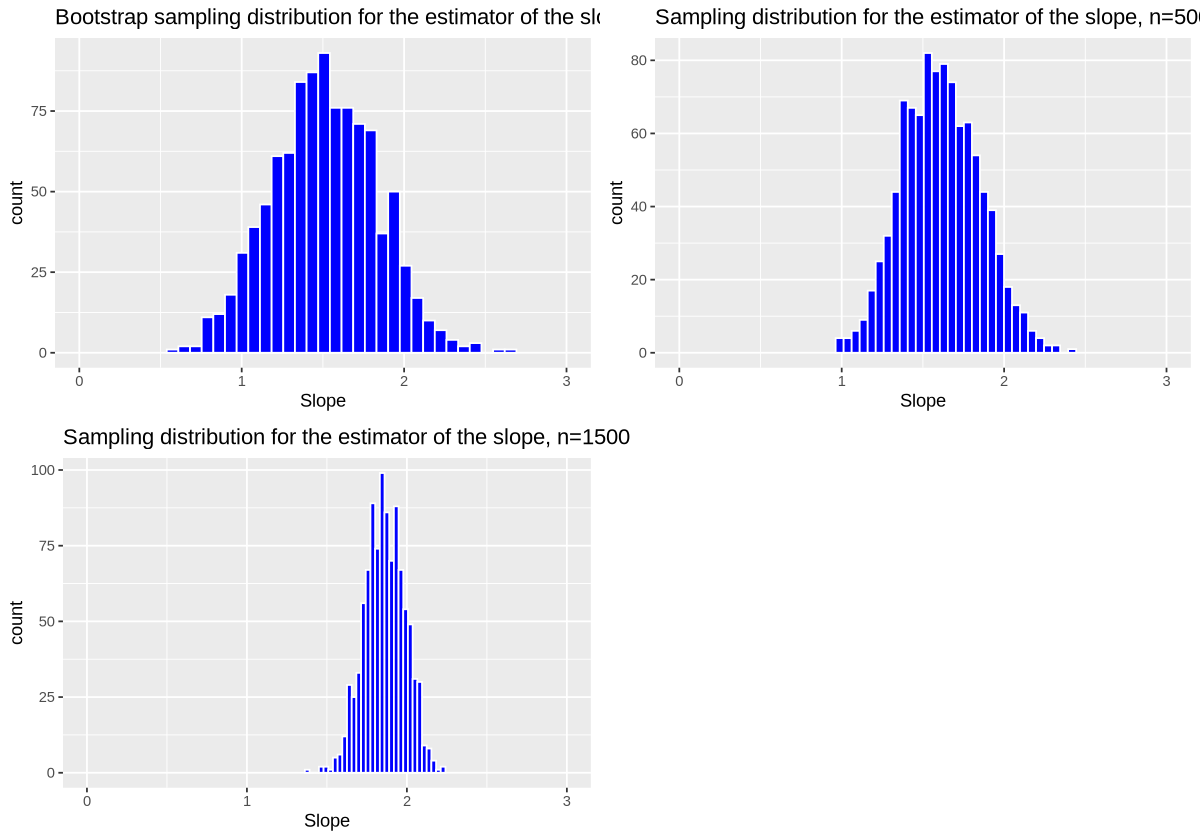

In [52]:
#run this cell

plot_grid(slope_sampling_dist_250 , slope_sampling_dist_500 ,slope_sampling_dist_1500 )

**Question 7.2.3**
<br>{points: 1}

Which of the following observataion about the sampling distribution is true?

**A.** The sampling distribution of the estimator of the slope does not change with the size of the sample we bootstrapped from

**B.** The center of sampling distribution of the estimator of the slope does not change with the size of the sample we bootstrapped from

**C.** The sampling distribution of the estimator of the slope becomes tighter as the size of the sample we bootstrapped from increases


*Assign your answer to an object called `answer7.2.3`. Your answer should be one of `"A"`, `"B"`, or `"C"` surrounded by quotes.*

In [53]:
# answer7.2.3 <- 

# your code here
answer7.2.3 <- "C"

In [54]:
test_7.2.3()

Test passed 🥳
Test passed 😀
Test passed 🎉
[1] "Success!"


### 7.3 Bootstrap Confidence Intervals

In this exercise we use the bootstrapping sampling distribution to compute *bootstrap percentile* CIs of regression parameters.

This empirical sampling distribution can be used to make inference, for example to construct CIs (also done in STAT 201). We will use the percentile method to obtain CIs from the list of bootstrap estimates.

**Question 7.3**
<br>{points: 1}

Obtain a summary of the $B$ results, `boot_SLR_cancer_CIs`, from `lm_boot250` with two rows (one for `boot_intercept` and another for `boot_slope`) and three columns: boostrap estimate average (`B_avg`), 95% lower bound quantile (`B_conf.low`), and 95% upper bound quantile (`B_conf.high`).

*Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*

In [55]:
# boot_SLR_CIs <- data.frame(
#   B_avg = lm_boot250 %>% summarize(
#     boot_intercept = ...,
#     boot_slope = ...
#   ) %>% unlist(),
#   B_conf.low = lm_boot250 %>% summarize(
#     boot_intercept = ...,
#     boot_slope = ...
#   ) %>% unlist(),
#   B_conf.high = lm_boot250 %>% summarize(
#     boot_intercept = ...,
#     boot_slope = ...
#   ) %>% unlist()
# ) %>% mutate_if(is.numeric, round, 2)
# boot_SLR_CIs

# your code here
boot_SLR_CIs <- data.frame(
  B_avg = lm_boot250 %>% summarize(
    boot_intercept = mean(boot_intercept),
    boot_slope = mean(boot_slope)
  ) %>% unlist(),
  B_conf.low = lm_boot250 %>% summarize(
    boot_intercept = quantile(boot_intercept, 0.025),
    boot_slope = quantile(boot_slope, 0.025)
  ) %>% unlist(),
  B_conf.high = lm_boot250 %>% summarize(
    boot_intercept = quantile(boot_intercept, 0.975),
    boot_slope = quantile(boot_slope, 0.975)
  ) %>% unlist()
) %>% mutate_if(is.numeric, round, 2)
boot_SLR_CIs

B_avg  B_conf.low B_conf.high
boot_intercept 153.23 144.09     162.64     
boot_slope       1.51   0.88       2.14

In [56]:
test_7.3()

Test passed 😸
Test passed 😀
Test passed 😀
Test passed 🥇
Test passed 😀
Test passed 😸
Test passed 😀
[1] "Success!"


#### With `infer`

In [57]:
#run this cell

percentile_ci <- bootstrap_slope_infer %>% 
  get_confidence_interval(type = "percentile", level = 0.95)
percentile_ci

lower_ci  upper_ci
1 0.8844579 2.138295

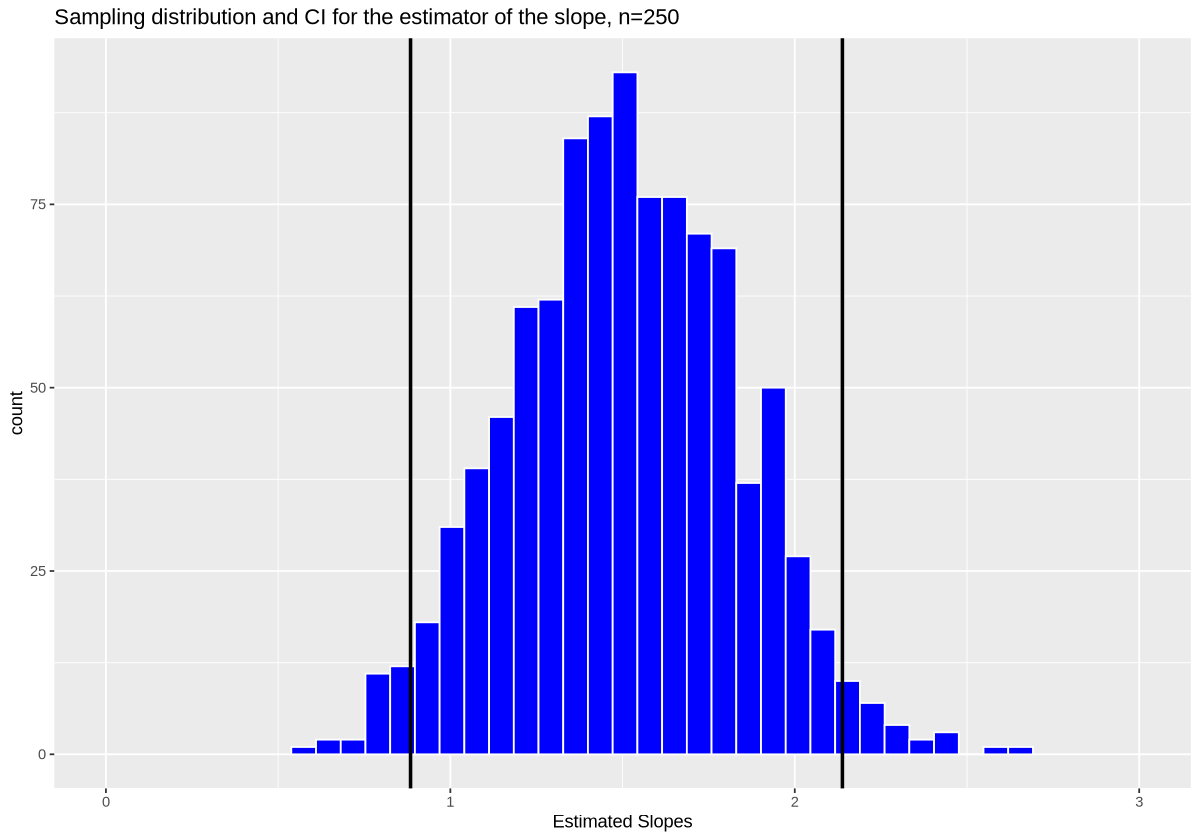

In [58]:
slope_sampling_dist_250 <-  ggplot(lm_boot250, aes(x = boot_slope)) +
    geom_histogram(bins = 30, color = "white", fill = "blue") +
    geom_vline(aes(xintercept = quantile(boot_slope,0.025)),size=1)+
    geom_vline(aes(xintercept = quantile(boot_slope,0.975)),size=1) +
    coord_cartesian(xlim = c(0, 3)) +
    xlab("Estimated Slopes") +
    ggtitle("Sampling distribution and CI for the estimator of the slope, n=250")

slope_sampling_dist_250

#### With `infer`

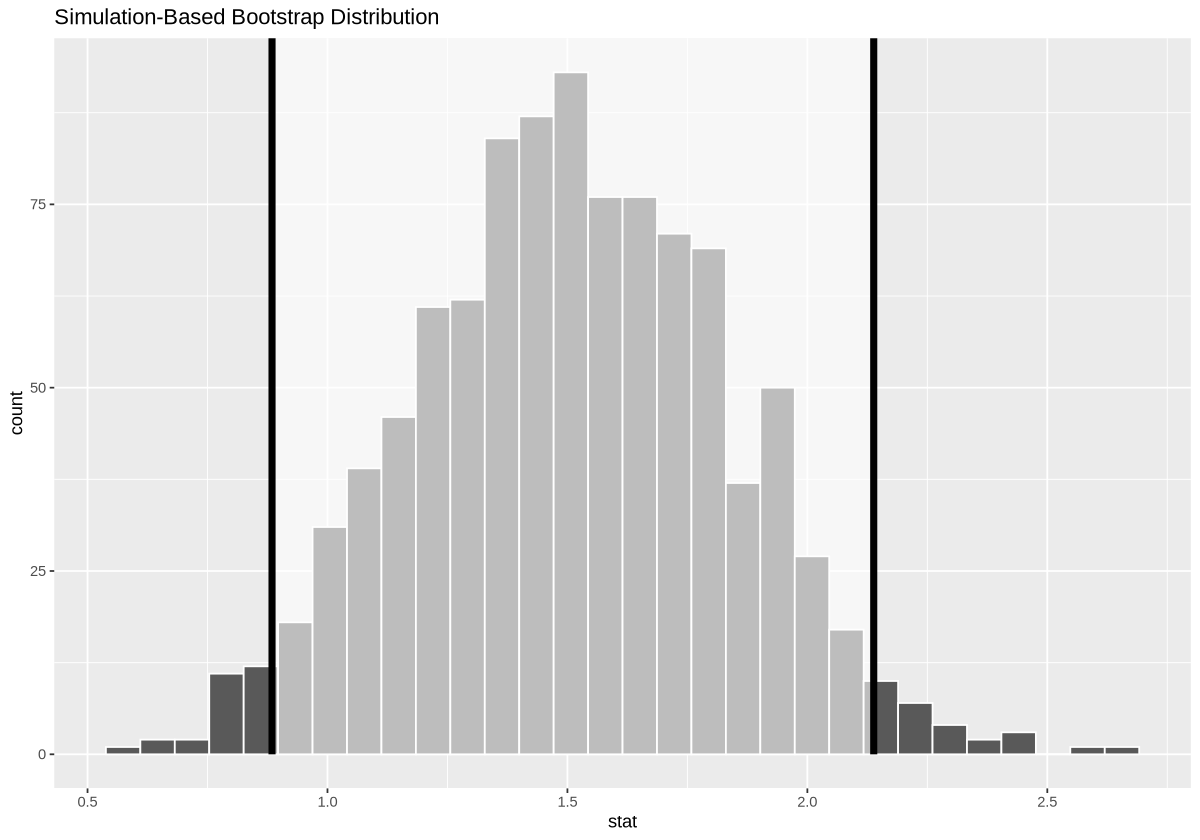

In [59]:
#run this cell

visualize(bootstrap_slope_infer, bin=30) + 
  shade_confidence_interval(endpoints = percentile_ci, fill = "white",
                            linetype = "solid", color = "black") 